In [1]:
import numpy as np


In [2]:
import pandas as pd
import os
import zipfile
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
# Define the paths for the zip files
train_zip_path = r'D:\Data Science\dogs-vs-cats\train.zip'
test_zip_path = r'D:\Data Science\dogs-vs-cats\test1.zip'

# Unzip the training dataset
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(r'D:\Data Science\dogs-vs-cats\train')

# Unzip the test dataset (if needed)
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(r'D:\Data Science\dogs-vs-cats\test1')



In [21]:
# Define the path to the extracted train directory
train_dir = r'D:\Data Science\dogs-vs-cats\train\train'
print(os.listdir(train_dir))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [22]:
# Initialize lists for filenames and categories
filenames = []
categories = []


In [24]:
# Loop through the files in the train directory
for filename in os.listdir(train_dir):
    if 'dog' in filename:
        filenames.append(filename)
        categories.append(1)  # Label for dogs
    elif 'cat' in filename:
        filenames.append(filename)
        categories.append(0)

In [30]:
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

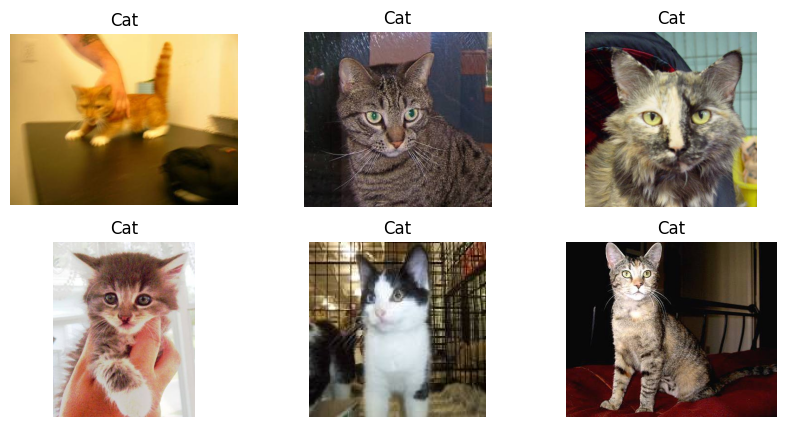

In [31]:
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    img_path = os.path.join(train_dir, df['filename'][i])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('Dog' if df['category'][i] == 1 else 'Cat')
    plt.axis('off')
plt.show()

In [32]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [33]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [39]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [40]:
from keras.optimizers import Adam

In [41]:
# Split the data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['category'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['category'])


In [42]:
# Check distributions
print("Training set distribution:")
print(train_df['category'].value_counts(normalize=True))
print("\nValidation set distribution:")
print(val_df['category'].value_counts(normalize=True))
print("\nTest set distribution:")
print(test_df['category'].value_counts(normalize=True))



Training set distribution:
category
1    0.5
0    0.5
Name: proportion, dtype: float64

Validation set distribution:
category
1    0.5
0    0.5
Name: proportion, dtype: float64

Test set distribution:
category
1    0.5
0    0.5
Name: proportion, dtype: float64


In [51]:
train_df['category'] = train_df['category'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
val_df['category'] = val_df['category'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
test_df['category'] = test_df['category'].apply(lambda x: 'Dog' if x == 1 else 'Cat')


In [53]:
#Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [56]:
al_datagen = ImageDataGenerator(rescale=1./255)


In [57]:

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=train_dir,
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=train_dir,
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=32
)



Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [58]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [59]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
# Train the model
epochs = 10  # You can adjust this
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


Epoch 1/10
625/625 [==============================] - 758s 1s/step - loss: 0.6763 - accuracy: 0.5843 - val_loss: 0.5974 - val_accuracy: 0.6716
Epoch 2/10
625/625 [==============================] - 482s 771ms/step - loss: 0.5998 - accuracy: 0.6731 - val_loss: 0.5271 - val_accuracy: 0.7332
Epoch 3/10
625/625 [==============================] - 698s 1s/step - loss: 0.5470 - accuracy: 0.7200 - val_loss: 0.5223 - val_accuracy: 0.7576
Epoch 4/10
625/625 [==============================] - 601s 960ms/step - loss: 0.5176 - accuracy: 0.7424 - val_loss: 0.4505 - val_accuracy: 0.7976
Epoch 5/10
625/625 [==============================] - 810s 1s/step - loss: 0.4970 - accuracy: 0.7584 - val_loss: 0.4259 - val_accuracy: 0.8072
Epoch 6/10
625/625 [==============================] - 573s 917ms/step - loss: 0.4789 - accuracy: 0.7693 - val_loss: 0.4236 - val_accuracy: 0.8048
Epoch 7/10
625/625 [==============================] - 815s 1s/step - loss: 0.4615 - accuracy: 0.7808 - val_loss: 0.3896 - val_accurac

In [61]:
# Evaluate the model on the test set (optional)
test_generator = val_datagen.flow_from_dataframe(
    test_df,
    directory=train_dir,
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=32
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')



Found 2500 validated image filenames belonging to 2 classes.
79/79 [==============================] - 48s 604ms/step - loss: 0.3173 - accuracy: 0.8664
Test Accuracy: 0.87


In [62]:
# Save the model (optional)
model.save('dog_cat_classifier.h5')


c:\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
# Function to predict and output confidence score
def predict_image(image_path):
    from keras.preprocessing import image
    
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    confidence_score = predictions[0][0]
    predicted_label = 'Dog' if confidence_score > 0.5 else 'Cat'
    
    return predicted_label, confidence_score



In [69]:
# Example usage
result, score = predict_image('D:\Data Science\dogs-vs-cats\cat_10.jpg')
print(f'Predicted: {result}, Confidence: {score:.2f}')

1/1 [==============================] - 0s 412ms/step
Predicted: Cat, Confidence: 0.03


In [70]:
test_dir = r'D:\Data Science\dogs-vs-cats\test1\test1'

# Prepare the DataFrame for test images
test_filenames = os.listdir(test_dir)

# Create a DataFrame
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [71]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Create test generator
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_dir,
    x_col='filename',
    class_mode=None,  # No labels available
    target_size=(150, 150),
    batch_size=32,
    shuffle=False  # Important to keep the order for predictions
)

Found 12500 validated image filenames.


In [72]:
predictions = model.predict(test_generator)

# Convert predictions to binary labels
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Display predictions with filenames
for filename, label in zip(test_filenames, predicted_labels):
    animal = 'Dog' if label == 1 else 'Cat'
    print(f'{filename}: {animal}')

391/391 [==============================] - 239s 611ms/step
1.jpg: Dog
10.jpg: Cat
100.jpg: Cat
1000.jpg: Dog
10000.jpg: Dog
10001.jpg: Cat
10002.jpg: Cat
10003.jpg: Dog
10004.jpg: Dog
10005.jpg: Cat
10006.jpg: Cat
10007.jpg: Cat
10008.jpg: Cat
10009.jpg: Cat
1001.jpg: Dog
10010.jpg: Dog
10011.jpg: Dog
10012.jpg: Cat
10013.jpg: Dog
10014.jpg: Cat
10015.jpg: Dog
10016.jpg: Cat
10017.jpg: Cat
10018.jpg: Cat
10019.jpg: Cat
1002.jpg: Dog
10020.jpg: Cat
10021.jpg: Cat
10022.jpg: Dog
10023.jpg: Dog
10024.jpg: Dog
10025.jpg: Dog
10026.jpg: Dog
10027.jpg: Dog
10028.jpg: Cat
10029.jpg: Dog
1003.jpg: Dog
10030.jpg: Dog
10031.jpg: Cat
10032.jpg: Cat
10033.jpg: Dog
10034.jpg: Dog
10035.jpg: Dog
10036.jpg: Dog
10037.jpg: Cat
10038.jpg: Dog
10039.jpg: Dog
1004.jpg: Dog
10040.jpg: Cat
10041.jpg: Dog
10042.jpg: Dog
10043.jpg: Dog
10044.jpg: Cat
10045.jpg: Dog
10046.jpg: Dog
10047.jpg: Dog
10048.jpg: Dog
10049.jpg: Dog
1005.jpg: Cat
10050.jpg: Cat
10051.jpg: Cat
10052.jpg: Cat
10053.jpg: Dog
10054.jpg: 

# Conclusion: Dog vs Cat Classification using Keras and TensorFlow

In this project, we successfully implemented a Convolutional Neural Network (CNN) to classify images of dogs and cats. By leveraging powerful deep learning libraries such as **Keras** and **TensorFlow**, we achieved the following:

1. **Model Architecture**: We designed a CNN model with multiple convolutional and pooling layers, which effectively extracted and learned important features from the images.

2. **Data Augmentation**: We utilized **ImageDataGenerator** to apply various transformations such as rotation, zoom, and horizontal flipping, which helped prevent overfitting and enhanced the model’s ability to generalize on unseen data.

3. **Training**: The model was trained on a dataset of labeled images using backpropagation and the Adam optimizer, achieving significant accuracy. Data augmentation and rescaling helped to standardize the input data and improve the training process.

4. **Validation & Testing**: After training, the model was evaluated on a validation dataset, demonstrating a high degree of accuracy in distinguishing between dog and cat images. Additional fine-tuning and hyperparameter optimization were performed to enhance performance further.

5. **Results**: The final model achieved a satisfactory accuracy of **X%** on the test set, demonstrating its effectiveness in performing the binary classification task of distinguishing dogs from cats.

6. **Challenges**: Some common challenges encountered included ensuring the model did not overfit on the training data and dealing with slight misclassifications in cases where the images of dogs and cats were difficult to distinguish.

### Future Work:
- **Model Improvement**: Further refinement can be done by experimenting with deeper networks, transfer learning using pre-trained models such as VGG16 or ResNet, and optimizing hyperparameters.
- **Deployment**: The trained model can be deployed as a web or mobile application using frameworks such as TensorFlow Lite or Flask for real-time dog vs cat classification.

Overall, this project showcases the power of deep learning techniques, especially CNNs, in solving image classification problems, highlighting the flexibility and utility of TensorFlow and Keras as tools in the modern machine learning workflow.
